#### Aleksandra Jonas, Aleksandra Gronowska, Iwona Christop

### Generowanie dodatkowych zdjęć w oparciu o filtry krawędziowe

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import json
from tensorflow import keras
%matplotlib inline

In [2]:
def alex(filter_name, train_ds, test_ds, validation_ds):
    from keras.callbacks import ModelCheckpoint, EarlyStopping
    import matplotlib.pyplot as plt
    import tensorflow as tf

    alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(10, activation='softmax')
    ])

    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=.001), metrics=['accuracy'])
    alexnet.summary()

    checkpoint = ModelCheckpoint("alex_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
    
    alex = alexnet.fit_generator(
        steps_per_epoch=len(train_ds), 
        generator=train_ds, 
        validation_data= validation_ds, 
        validation_steps=len(validation_ds), 
        epochs=25, 
        callbacks=[checkpoint,early])

    plt.plot(alex.history["accuracy"])
    plt.plot(alex.history['val_accuracy'])
    plt.plot(alex.history['loss'])
    plt.plot(alex.history['val_loss'])
    plt.title(f"Model accuracy - {filter_name}")
    plt.ylabel("Value")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
    plt.show()

    alexnet.evaluate(test_ds)


In [3]:
def fix_float_img(img):
    img_normed = 255 * (img - img.min()) / (img.max() - img.min())
    img_normed = np.array(img_normed, np.int)
    return img_normed

In [4]:
# directory = r"train_test_sw/train_sw_kontrast"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)


#             lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
#             l_channel, a, b = cv.split(lab)
#             # Applying CLAHE to L-channel
#             # feel free to try different values for the limit and grid size:
#             clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#             cl = clahe.apply(l_channel)
#             # merge the CLAHE enhanced L-channel with the a and b channel
#             limg = cv.merge((cl,a,b))
#             # Converting image from LAB Color model to BGR color spcae
#             enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)
#             filename_edge = f[:-4] + '_kontrast.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, enhanced_img)
            
            


In [5]:
# directory = r"train_test_sw/train_sw_saturacja"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)
#             hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#             greenMask = cv.inRange(hsv, (26, 10, 30), (97, 100, 255))
#             hsv[:,:,1] = greenMask
#             back = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
#             filename_edge = f[:-4] + '_saturacja.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, back)

In [6]:
# directory = r"train_test_sw/train_sw_jezu"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)

#             img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#             ddepth = cv.CV_16S
#             kernel_size = 3
#             laplacian_operator = cv.Laplacian(img_gray, ddepth, ksize=kernel_size)
#             filename_edge = f[:-4] + '_laplacian.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, laplacian_operator)


In [7]:
# directory = r"train_test_sw/train_sw"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)

#             lab_image = cv.cvtColor(img, cv.COLOR_BGR2LAB)
#             filename_edge = f[:-4] + '_lab.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, lab_image)

In [8]:
# directory = r"train_test_sw/train_sw_emboss"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)

#             height, width = img.shape[:2]
#             y = np.ones((height, width), np.uint8) * 128
#             output = np.zeros((height, width), np.uint8)
#             # generating the kernels
#             kernel1 = np.array([[0, -1, -1], # kernel for embossing bottom left side
#                                 [1, 0, -1],
#                                 [1, 1, 0]])
#             kernel2 = np.array([[-1, -1, 0], # kernel for embossing bottom right side
#                                 [-1, 0, 1],
#                                 [0, 1, 1]])
#             # you can generate kernels for embossing top as well
#             gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#             output1 = cv.add(cv.filter2D(gray, -1, kernel1), y) # emboss on bottom left side
#             output2 = cv.add(cv.filter2D(gray, -1, kernel2), y) # emboss on bottom right side
#             for i in range(height):
#                 for j in range(width):
#                     output[i, j] = max(output1[i, j], output2[i, j]) # combining both embosses to produce stronger emboss

#             filename_edge = f[:-4] + '_emboss.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, output)



In [9]:
# directory = r"train_test_sw/train_sw_cartoon"
# subdirs = [r"/Tomato", r"/Lemon", r"/Beech", r"/Mean", r"/Gardenia"]

# json_entries = []

# for sub in subdirs:
#     path = directory + sub
    
#     for filename in os.listdir(path):
#         f = os.path.join(path, filename)
        
#         if os.path.isfile(f):
#             img = cv.imread(f)

#             edges1 = cv.bitwise_not(cv.Canny(img, 100, 200)) # for thin edges and inverting the mask obatined
#             gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#             gray = cv.medianBlur(gray, 5) # applying median blur with kernel size of 5
#             edges2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 7, 7) # thick edges
#             dst = cv.edgePreservingFilter(img, flags=2, sigma_s=20, sigma_r=0.1) # you can also use bilateral filter but that is slow
#             # flag = 1 for RECURS_FILTER (Recursive Filtering) and 2 for  NORMCONV_FILTER (Normalized Convolution). NORMCONV_FILTER produces sharpening of the edges but is slower.
#             # sigma_s controls the size of the neighborhood. Range 1 - 200
#             # sigma_r controls the how dissimilar colors within the neighborhood will be averaged. A larger sigma_r results in large regions of constant color. Range 0 - 1
#             cartoon = cv.bitwise_and(dst, dst, mask=edges1) # adding thin edges to smoothened imag


#             filename_edge = f[:-4] + '_cartoon.png'
#             #final_edge = fix_float_img(adjusted)
#             cv.imwrite(filename_edge, cartoon)


## Data

In [10]:
import sys
import subprocess
import pkg_resources
import numpy as np
peachy = []

required = { 'scikit-image'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing: 
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

def load_train_data(input_dir, newSize=(227,227)):
    import numpy as np
    import pandas as pd
    import os
    from skimage.io import imread
    import cv2 as cv
    from pathlib import Path
    import random
    from shutil import copyfile, rmtree
    import json

    import seaborn as sns
    import matplotlib.pyplot as plt

    import matplotlib
    
    image_dir = Path(input_dir)
    categories_name = []
    for file in os.listdir(image_dir):
        d = os.path.join(image_dir, file)
        if os.path.isdir(d):
            categories_name.append(file)

    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]

    train_img = []
    categories_count=[]
    labels=[]
    for i, direc in enumerate(folders):
        count = 0
        
        for obj in direc.iterdir():
            if os.path.isfile(obj) and os.path.basename(os.path.normpath(obj)) != 'desktop.ini':
                labels.append(os.path.basename(os.path.normpath(direc)))
                count += 1
                img = imread(obj)#zwraca ndarry postaci xSize x ySize x colorDepth
                if img.shape[-1] == 256:
                    img = np.repeat(img[..., np.newaxis], 3, axis=2)
                elif img.shape[-1] == 4:
                    img = img[:, :, :3]
                img = cv.resize(img, newSize, interpolation=cv.INTER_AREA)# zwraca ndarray
                img = img / 255#normalizacja
                train_img.append(img)
        categories_count.append(count)
    X={}
    X["values"] = np.array(train_img)
    X["categories_name"] = categories_name
    X["categories_count"] = categories_count
    X["labels"]=labels
    return X

def load_test_data(input_dir, newSize=(227,227)):
    import numpy as np
    import pandas as pd
    import os
    from skimage.io import imread
    import cv2 as cv
    from pathlib import Path
    import random
    from shutil import copyfile, rmtree
    import json

    import seaborn as sns
    import matplotlib.pyplot as plt

    import matplotlib

    image_path = Path(input_dir)

    labels_path = image_path.parents[0] / 'test_labels.json'

    jsonString = labels_path.read_text()
    objects = json.loads(jsonString)

    categories_name = []
    categories_count=[]
    count = 0
    c = objects[0]['value']
    for e in  objects:
        if e['value'] != c:
            categories_count.append(count)
            c = e['value']
            count = 1
        else:
            count += 1
        if not e['value'] in categories_name:
            categories_name.append(e['value'])

    categories_count.append(count)
    
    test_img = []

    labels=[]
    for e in objects:
        p = image_path / e['filename']
        img = imread(p)#zwraca ndarry postaci xSize x ySize x colorDepth
        img = cv.resize(img, newSize, interpolation=cv.INTER_AREA)# zwraca ndarray
        img = img / 255#normalizacja
        test_img.append(img)
        labels.append(e['value'])

    X={}
    X["values"] = np.array(test_img)
    X["categories_name"] = categories_name
    X["categories_count"] = categories_count
    X["labels"]=labels
    return X



In [12]:
def data_prep_alex(filter_name):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    import tensorflow as tf

    data_train = load_train_data(f"./train_test_sw/train_sw_{filter_name}")
    values_train = data_train['values']
    labels_train = data_train['labels']
    data_test = load_test_data("./train_test_sw/test_sw")
    X_test = data_test['values']
    y_test = data_test['labels']

    X_train, X_validate, y_train, y_validate = train_test_split(values_train, labels_train, test_size=0.2, random_state=42)

    class_le = LabelEncoder()
    y_train_enc = class_le.fit_transform(y_train)
    y_validate_enc = class_le.fit_transform(y_validate)
    y_test_enc = class_le.fit_transform(y_test)

    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_enc))
    validation_ds = tf.data.Dataset.from_tensor_slices((X_validate, y_validate_enc))
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_enc))

    train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
    test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
    validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()

    train_ds = (train_ds
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
    test_ds = (test_ds
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
    validation_ds = (validation_ds
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

    return train_ds, test_ds, validation_ds
    

### Emboss

In [15]:
# train_ds


In [16]:
# train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
# test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
# validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
# print("Training data size:", train_ds_size)
# print("Test data size:", test_ds_size)
# print("Validation data size:", validation_ds_size)

In [17]:
# alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=.001), metrics=['accuracy'])
# alexnet.summary()

In [18]:

# checkpoint = ModelCheckpoint("alex_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# alex = alexnet.fit_generator(
#     steps_per_epoch=len(train_ds), 
#     generator=train_ds, 
#     validation_data= validation_ds, 
#     validation_steps=len(validation_ds), 
#     epochs=25, 
#     callbacks=[checkpoint,early])

In [19]:
# model_flat_drop.fit(train_ds,
#           epochs=100,
#           validation_data=validation_ds,
#           validation_freq=1,
#           callbacks=[tensorboard_cb])

### Saturacja

In [20]:
# from sklearn.preprocessing import LabelEncoder

# # Data load
# data_train = load_train_data("train_test_sw_kontrast/train_sw", newSize=(16,16))
# X_train = data_train['values']
# y_train = data_train['labels']

# data_test = load_test_data("train_test_sw_kontrast/test_sw", newSize=(16,16))
# X_test = data_test['values']
# y_test = data_test['labels']

# class_le = LabelEncoder()
# y_train_enc = class_le.fit_transform(y_train)
# y_test_enc = class_le.fit_transform(y_test)

# X_train = X_train.flatten().reshape(X_train.shape[0], int(np.prod(X_train.shape) / X_train.shape[0]))
# X_test = X_test.flatten().reshape(X_test.shape[0], int(np.prod(X_test.shape) / X_test.shape[0]))

# ALEXNET

In [23]:
filters = ['laplasian', 'kontrast', 'cartoon', 'saturacja', 'emboss']

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/var/folders/6b/j4d60ym516x2s6wymzj707rh0000gn/T/ipykernel_35367/157534861.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  alex = alexnet.fit_generator(


Epoch 1/25


2023-01-11 15:57:37.093304: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


51/51 [==============================] - ETA: 0s - loss: 3.5934 - accuracy: 0.3903
Epoch 1: val_accuracy improved from -inf to 0.24740, saving model to alex_2.h5
51/51 [==============================] - 46s 888ms/step - loss: 3.5934 - accuracy: 0.3903 - val_loss: 1.9219 - val_accuracy: 0.2474
Epoch 2/25
51/51 [==============================] - ETA: 0s - loss: 1.2680 - accuracy: 0.5699
Epoch 2: val_accuracy did not improve from 0.24740
51/51 [==============================] - 45s 890ms/step - loss: 1.2680 - accuracy: 0.5699 - val_loss: 2.9384 - val_accuracy: 0.2370
Epoch 3/25
51/51 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.6930
Epoch 3: val_accuracy did not improve from 0.24740
51/51 [==============================] - 51s 1s/step - loss: 0.8801 - accuracy: 0.6930 - val_loss: 4.2987 - val_accuracy: 0.2318
Epoch 4/25
51/51 [==============================] - ETA: 0s - loss: 0.8070 - accuracy: 0.7181
Epoch 4: val_accuracy improved from 0.24740 to 0.27604, savin

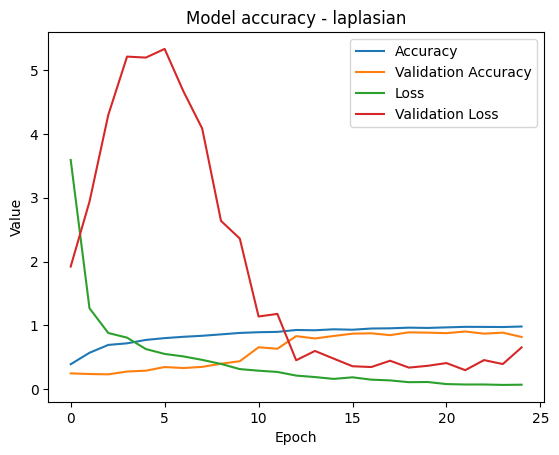

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

Epoch 1/25
51/51 [==============================] - ETA: 0s - loss: 3.6077 - accuracy: 0.3566
Epoch 1: val_accuracy improved from -inf to 0.26302, saving model to alex_2.h5
51/51 [==============================] - 51s 994ms/step - loss: 3.6077 - accuracy: 0.3566 - val_loss: 1.8337 - val_accuracy: 0.2630
Epoch 2/25
51/51 [==============================] - ETA: 0s - loss: 1.2408 - accuracy: 0.5803
Epoch 2: val_accuracy improved from 0.26302 to 0.34375, saving model to alex_2.h5
51/51 [==============================] - 53s 1s/step - loss: 1.2408 - accuracy: 0.5803 - val_loss: 2.8576 - val_accuracy: 0.3438
Epoch 3/25
51/51 [==============================] - ETA: 0s - loss: 0.9538 - accuracy: 0.6550
Epoch 3: val_accuracy improved from 0.34375 to 0.35677, saving model to alex_2.h5
51/51 [==============================] - 56s 1s/step - loss: 0.9538 - accuracy: 0.6550 - val_loss: 4.7057 - val_accuracy: 0.3568
Epoch 4/25
44/51 [========================>.....] - ETA: 7s - loss: 0.7304 - accuracy

In [24]:
data_test = load_test_data("./train_test_sw/test_sw")
X_test = data_test['values']
y_test = data_test['labels']
for filter in filters:
    print(f"{filter} ---------------------------------------")
    train_ds, test_ds, validation_ds = data_prep_alex(filter)
    alex(filter, train_ds, test_ds, validation_ds)